# ML Semana 2 Grupo #777
- Natalia Nobre
- Joaquin Ferreira
- Mathias Rodriguez

### Configuración del ambiente:

In [180]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import confusion_matrix
#Importamos la libreria sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree

### Importo los datos
Importo los datos usando <code>pandas.read_csv()</code>

In [181]:
# Importo con pandas para crear el Dataframe y lo nombro como "df"
url_csv = "vgsalesv3.csv"
df = pd.read_csv(url_csv, sep=';')

In [182]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [183]:
# Sacamos las columnas que no son utiles para el analisis
df.drop(columns=["Rank", "NA_Sales", "EU_Sales", "Other_Sales","Publisher","Year","Name"],inplace=True)

In [184]:
# incrementan en el tiempo o no, y los campos faltantes de global sales ya que es la variable objetivo
df.dropna(subset=['Global_Sales'], inplace=True)
df.dropna(subset=['JP_Sales'], inplace=True)


In [185]:
#Factorizamos la columna genre y nos quedamos con sus valores numericos ignorando la otra columna correspondiente al valor
#df['Factor_Platform'] = df['Platform'].factorize()[0]
#df['Factor_Genre'] = df['Genre'].factorize()[0]

df_copy=df.drop(["Platform"],axis = "columns")
df_copy.drop(columns=["Genre"],inplace=True)



In [186]:
#Aplanamos plataforma y factorizamos
df_platform = pd.get_dummies(df['Platform'])
df_copy2 = pd.concat([df_copy,df_platform], axis=1 )
df_copy2.head()
###


,JP_Sales,Global_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,3.77,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.81,40.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.79,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.28,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,10.22,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
genre = df['Genre']
xTrain,xTest,yTrain,yTest = train_test_split(df_copy2,genre, test_size = 0.20, random_state=0)

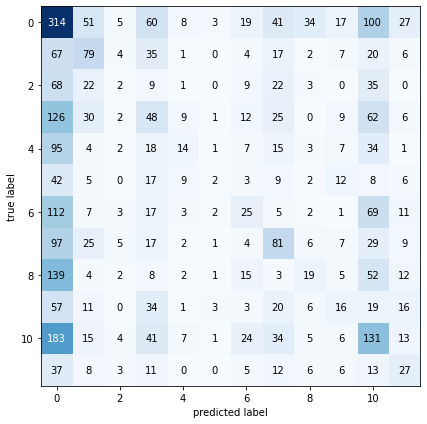

In [189]:

model = RandomForestClassifier(n_estimators=19, random_state = 2016, min_samples_leaf = 8)
model.fit(xTrain, yTrain)
model.score(xTest, yTest)
Ypred = model.predict(xTest)

#Creamos la confusion matrix
matriz = confusion_matrix(yTest, Ypred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [190]:
#Creamos arbol de desición
dt= tree.DecisionTreeClassifier()

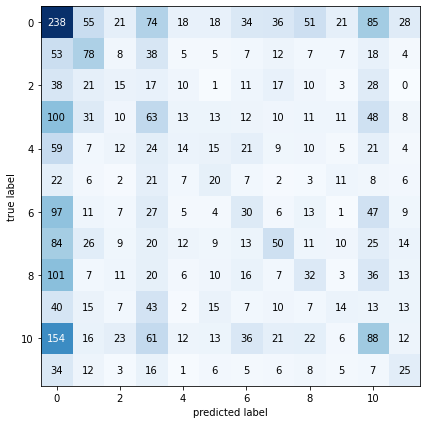

In [192]:
dt.fit(xTrain,yTrain)
#vemos la accuaracy
dt.score(xTest, yTest)

#Graficamos la confusion matrix
Ypred = dt.predict(xTest)
matriz = confusion_matrix(yTest,Ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()
